C:\Users\nikip\AppData\Local\Temp\ipykernel_48944\1569631877.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_data.index = pd.to_datetime(us_data.index)


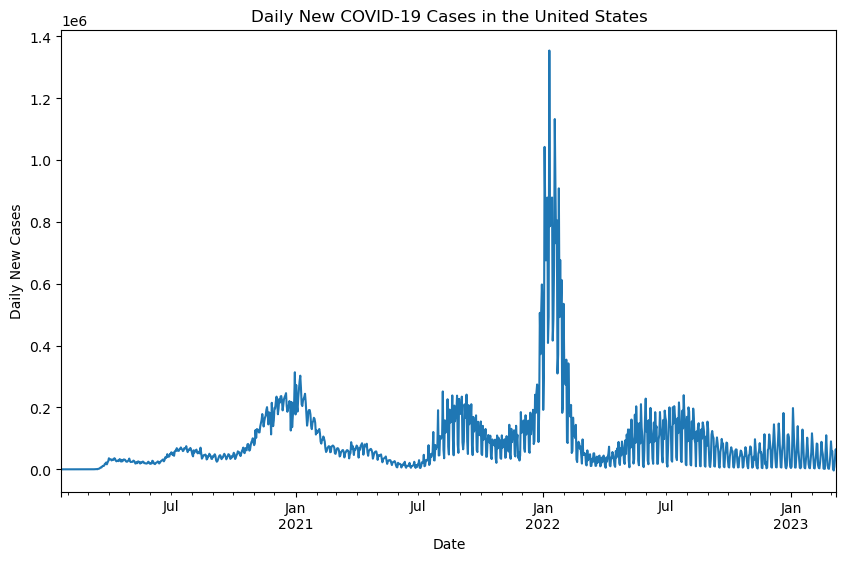

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the COVID-19 daily confirmed cases data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data = pd.read_csv(url) 

# Filter the data for the United States
# The dataset contains columns for each country and each date's confirmed cases
us_data = covid_data[covid_data['Country/Region'] == 'US'].iloc[:, 4:].sum(axis=0)

# Convert the index to datetime for time series analysis
us_data.index = pd.to_datetime(us_data.index)

# Calculate daily new cases
us_daily_new_cases = us_data.diff().fillna(0)

# Visualize the daily new cases for the United States
plt.figure(figsize=(10, 6))
us_daily_new_cases.plot()
plt.title('Daily New COVID-19 Cases in the United States')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.show()


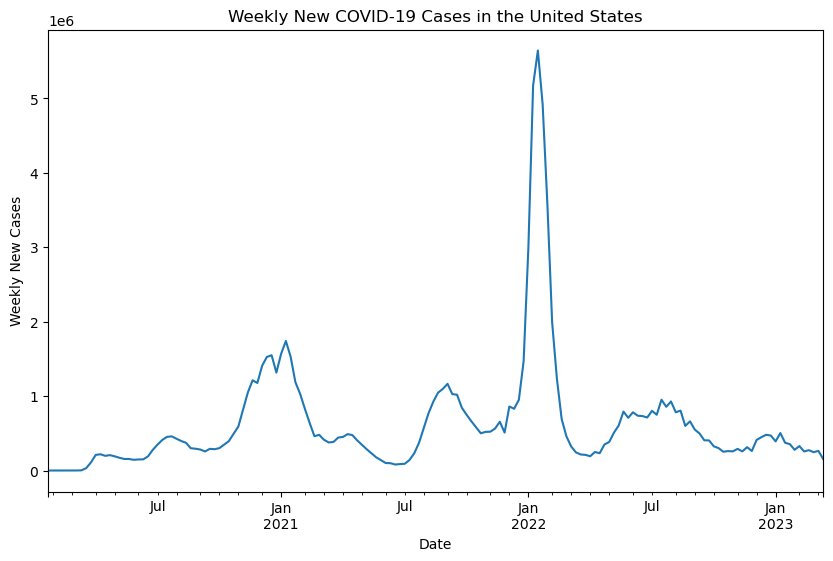

In [41]:
# Generate a date range for the year 2023 with a daily frequency
date_range_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a DataFrame with this date range and fill it with random data to simulate daily temperatures
np.random.seed(0)
daily_temperatures = pd.DataFrame({'Date': date_range_2023, 'Temperature': np.random.randint(-10, 35, size=len(date_range_2023))})

# Resample the COVID-19 data to weekly frequency and calculate the sum of new cases for each week
us_weekly_new_cases = us_daily_new_cases.resample('W').sum()

# Visualize the resampled data
plt.figure(figsize=(10, 6))
us_weekly_new_cases.plot()
plt.title('Weekly New COVID-19 Cases in the United States')
plt.xlabel('Date')
plt.ylabel('Weekly New Cases')
plt.show()

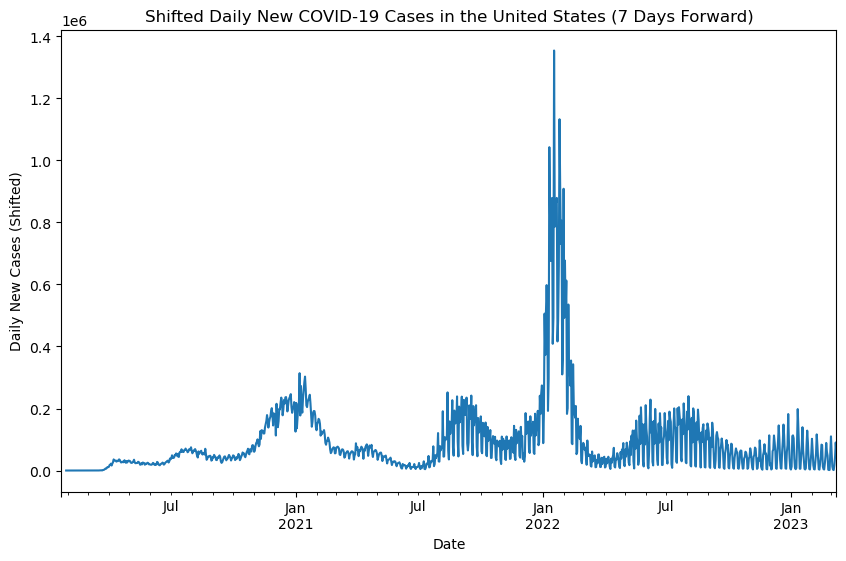

In [43]:
# Shift the COVID-19 data forward by 7 days
us_shifted_new_cases = us_daily_new_cases.shift(7)

# Visualize the shifted data
plt.figure(figsize=(10, 6))
us_shifted_new_cases.plot()
plt.title('Shifted Daily New COVID-19 Cases in the United States (7 Days Forward)')
plt.xlabel('Date')
plt.ylabel('Daily New Cases (Shifted)')
plt.show()


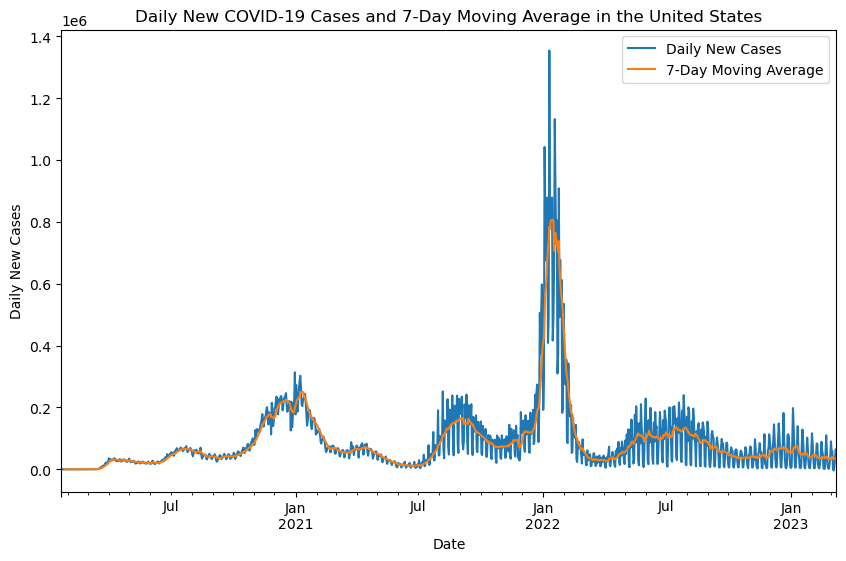

In [47]:
# Calculate a 7-day moving average of COVID-19 new cases
us_moving_avg_7d = us_daily_new_cases.rolling(window=7).mean()

# Visualize the 7-day moving average alongside the original data
plt.figure(figsize=(10, 6))
us_daily_new_cases.plot(label='Daily New Cases')
us_moving_avg_7d.plot(label='7-Day Moving Average')
plt.title('Daily New COVID-19 Cases and 7-Day Moving Average in the United States')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.legend()
plt.show()
